<a href="https://colab.research.google.com/github/JEOspina25/Metodos_Computacionales_taller/blob/main/Ospina_Juan_4246.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Juan Esteban Ospina Holguín
## 1007374246



# Paracaidista en un atmosfera no uniforme.
En una atmósfera isotérmica, la variación de la presión en función de la altitud está dada por la ley de Laplace.

$$
P=P_0 e^{-\frac{Mgy}{kT}}
$$
$P_0=1atm$ es la presión de la atmósfera a nivel del mar
M es el peso molecular del aire $28.8 g/mol=0.0288 kg/mol$
g es la aceleración de la gravedad
$k=1.3805·10^{-23}$ J/K es la constante de Boltzmann
$T$ es la temperatura de la atmósfera en kelvin
$NA=6.0225\times 10^{23}$ es el número de Avogadro, número de moléculas que caben en un mol.
Suponiendo que el aire se comporta como un gas ideal, su densidad varía con la altura de la misma forma que la presión, $\rho=\rho_0 exp(-y/\lambda)$. La densidad del aire al nivel del mar es $\rho_0=1.29 kg/m^3$ y la constante $\lambda=7482.2 m$

Las fuerzas que actuan sobre el paracaidista son: El peso y la fuerza de fricción $f=\frac{1}{2}\rho A \delta v^2$, donde $\rho$ es la densidad que depende de la altura, A es el area de seccion trasnversal expuesta al aire y $\delta $ es coeficiente de rozamiento. La Ecuacion diferencial de movimiento viene dada por:

$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + \frac{A\delta}{2m} \rho v^2 
$$$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - mg + k_0v^2 exp(-y/\lambda)
$$
donde $k_0=\frac{\rho_0A\delta}{2m}$, siendo $\rho_0$ la densidad al nivel del mar.

Para la situación descrita, su tarea será elaborar un notebook de jupyter para resolver lo siguente:

1. Elaborar una gráfica de la densidad como función de la altura.

2. Diseñar un programa que resuelva la ecuación diferencial que describe el movimiento del paracaidista, para los siguientes parámetros:

$m=60kg$, $A=0.3m^2$, $h=30km$.

$m=60kg$, $A=0.3m^2$, $h=40km$.

$m=60kg$, $A=0.3m^2$, $h=50km$.

$m=60kg$, $A=0.3m^2$, $h=60km$.

$m=60kg$, $A=0.3m^2$, $h=70km$.

3. Con la solucion de la ecuacion diferencial, elaborar una gráfica de.

la posición como función del tiempo.

La velocidad como función del tiempo.

La velocidad como función de la posición

4. Determine numéricamente y analiticamente el valor de la velocidad maxima para las diferentes altura Compara su resultado con:
http://www.sc.ehu.es/sbweb/fisica3/fluidos/paracaidas/paracaidas_1.html

5. Realice un grafico de la velocidad maxima como función de la altura de caida.


Reto:

El modelo puede ser mejorado si se tiene presente que la aceleración de la gravedad varia según la altura.

$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - \frac{GM}{(R+y)^2} + \frac{A\delta}{2m} \rho v^2 
$$
donde $G=6.67\times 10^{-11} \mathrm{Nm^2/kg}$, $M=5.98\times 10 ^{24} \mathrm{kg}$ y el radio de la Tierra es de $R=6.371\mathrm{km}$

Solucione la ecuación diferencial para este caso.

In [ ]:
#Librerías
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.interpolate import CubicSpline
from scipy.optimize import curve_fit
import pandas as pd


# 1. Grafica de densidad

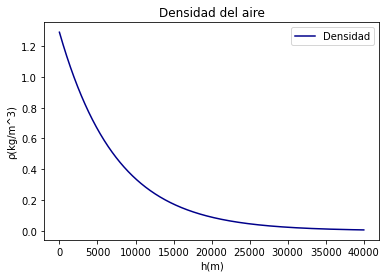

In [ ]:
#1
ρ0 = 1.29  #kg/m^3
λ = 7482.2 #m
def ρ(y):
    ρ = ρ0*np.exp(-y/λ)      #Función de densidad
    return ρ
y = np.linspace(0,40000,1000)#Desde cero a setenta kilometros
plt.plot(y,ρ(y),color = "darkblue",label = 'Densidad')
plt.xlabel('h(m)')
plt.ylabel('ρ(kg/m^3)')
plt.title('Densidad del aire')
plt.legend();

# 2. Solución de la EDO
Para solucionar la Edo, según la bibliografía, la ecuación se puede escribir como:
$$
\frac{\mathrm{d}^2y}{\mathrm{d}t^2} = - g + \frac{A\delta\rho_0}{2m}  v^2 exp(-y/\lambda)
$$

In [ ]:
# initial conditions
v_1 = 0 #velocidad inicial
x01 = np.array([30000, v_1]) #Lista de condiciones iniciales
x02 = np.array([40000, v_1]) #Lista de condiciones iniciales
x03 = np.array([50000, v_1]) #Lista de condiciones iniciales
x04 = np.array([60000, v_1]) #Lista de condiciones iniciales
x05 = np.array([70000, v_1]) #Lista de condiciones iniciales

m = 60     #Masa de 0.1kg
g = 9.8    # N/m
A = 0.3    #m^2 
λ = 7482.2 #m
ρ0 = 1.29  #kg/m^3
δ = 0.8    #unidades
k0 = ρ0*A*δ/(2)

# function that returns dy/dt
def func_paracaidista(x, t, params):
    m =  params[0]
    g =  params[1]
    k0 = params[2]
    λ =  params[3]
    
    dxdt = x[1]
    dvdt =  -g +(k0/m)*(x[1]**2)*np.exp(-x[0]/λ) 
    return [dxdt, dvdt]

params = [m, g, k0,λ ] #Lista de parametros

t = np.linspace(0,280,1000) # time points


y1 = odeint(func_paracaidista, x01, t, args=(params, ) )  # soluciona EDO
y2 = odeint(func_paracaidista, x02, t, args=(params, ) )  # soluciona EDO
y3 = odeint(func_paracaidista, x03, t, args=(params, ) )  # soluciona EDO
y4 = odeint(func_paracaidista, x04, t, args=(params, ) )  # soluciona EDO
y5 = odeint(func_paracaidista, x05, t, args=(params, ) )  # soluciona EDO

x1 = y1[:,0] #posicion en el tiempo 30km
v1 = y1[:,1] #Velocidad en el tiempo 30km

x2 = y2[:,0] #posicion en el tiempo 40km
v2 = y2[:,1] #Velocidad en el tiempo 40km

x3 = y3[:,0] #posicion en el tiempo 50km
v3 = y3[:,1] #Velocidad en el tiempo 50km

x4 = y4[:,0] #posicion en el tiempo 60km
v4 = y4[:,1] #Velocidad en el tiempo 60km

x5 = y5[:,0] #posicion en el tiempo 70km
v5 = y5[:,1] #Velocidad en el tiempo 70km

# 3. Graficas de posición y velocidad

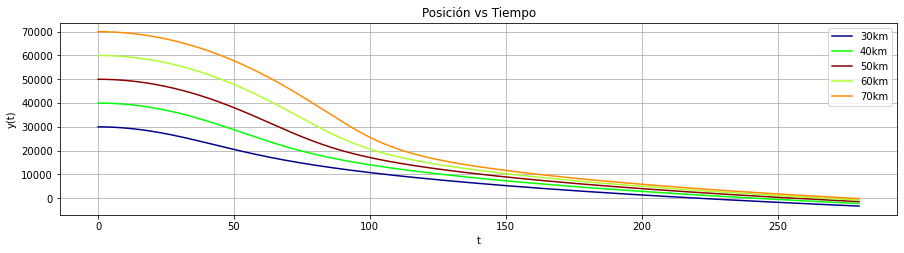

In [ ]:
fig1=plt.figure(figsize=(15,12))
plt.subplot(311)
plt.plot(t, x1,color = 'darkblue',label='30km') #posicion en funcion del tiempo para 30km
plt.plot(t, x2,color = "lime",label='40km') #posicion en funcion del tiempo para 40km
plt.plot(t, x3,color = 'darkred',label='50km') #posicion en funcion del tiempo para 50km
plt.plot(t, x4,color = 'greenyellow',label='60km') #posicion en funcion del tiempo para 60km
plt.plot(t, x5,color = 'darkorange',label='70km') #posicion en funcion del tiempo para 70km
plt.xlabel("t")    #nombre del eje x
plt.ylabel("y(t)") #nombre del eje y
plt.title('Posición vs Tiempo')

plt.grid()
plt.legend();

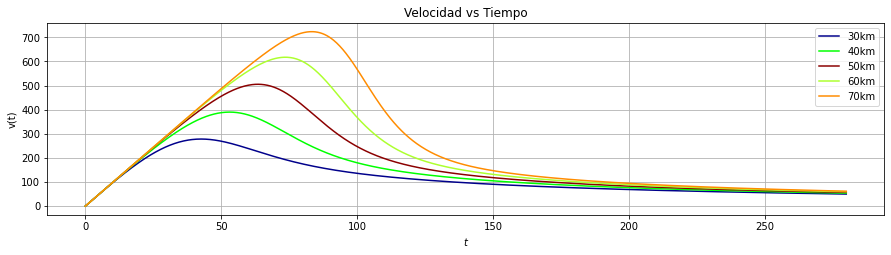

In [ ]:
fig1=plt.figure(figsize=(15,12))
plt.subplot(312)
plt.title('Velocidad vs Tiempo')
plt.plot(t, -v1,color = 'darkblue',label='30km') #Velocidad en funcion del tiempo para 30km
plt.plot(t, -v2,color = "lime",label='40km') #Velocidad en funcion del tiempo para 30km
plt.plot(t, -v3,color = 'darkred',label='50km') #Velocidad en funcion del tiempo para 30km
plt.plot(t, -v4,color = 'greenyellow',label='60km') #Velocidad en funcion del tiempo para 30km
plt.plot(t, -v5,color = 'darkorange',label='70km') #Velocidad en funcion del tiempo para 30km
plt.xlabel("$t$")    #nombre del eje x
plt.ylabel("v(t)") #nombre del eje y
plt.grid()
plt.legend();


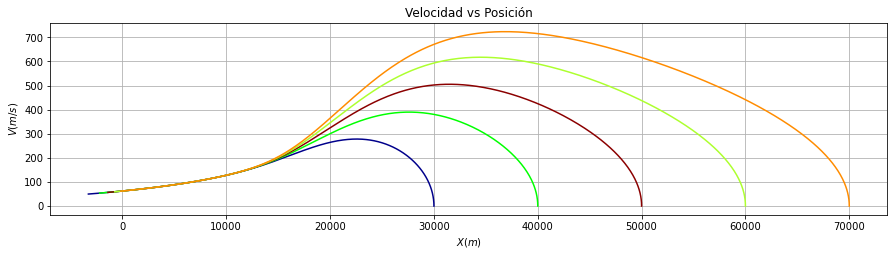

In [ ]:
fig1=plt.figure(figsize=(15,12))
plt.subplot(313)
plt.plot(x1, -v1,color = 'darkblue',label='30km') #Velocidad en funcion de la posición para 30km
plt.plot(x2, -v2,color = "lime",label='40km') #Velocidad en funcion de la posición para 40km
plt.plot(x3, -v3,color = 'darkred',label='50km') #Velocidad en funcion de la posición para 50km
plt.plot(x4, -v4,color = 'greenyellow',label='60km') #Velocidad en funcion de la posición para 60km
plt.plot(x5, -v5,color = 'darkorange',label='70km') #Velocidad en funcion de la posición para 70km
plt.xlabel("$X(m)$")    #nombre del eje x
plt.ylabel("$V(m/s)$") #nombre del eje y
plt.title('Velocidad vs Posición')
plt.grid()

# 4. Velocidad Máxima

Según la teoría, cuando se tiene la velocidad máxima la aceleración es cero. Esto lo sabemos porque en la curva de velocidad la pendiente de la recta tangente en el punto maximo es cero. Veamos la velocidad máxima para cada caso:

$$
        -g+k_0v^2exp(-y/\lambda) = 0
$$$$
v_{max}^2 = \frac{g}{k_0}e^{y/\lambda}
$$

Así, las velocidades máximas son:

In [ ]:
def vmax(y):
    return ((g/k0)*np.exp(y/λ))**0.5
h = [30000,40000,50000,60000,70000]
Vmax = []
for i in h:
    Vmax.append(vmax(i))
Vmax
df = pd.DataFrame()
df["Altura del salto [m]"] = h
df["Velocidad máxima [m/s]"] = Vmax
df

,Altura del salto [m],Velocidad máxima [m/s]
0,30000,59.072164
1,40000,115.239488
2,50000,224.812139
3,60000,438.569270
4,70000,855.572147


# 5. Gráfica de la velocidad máxima

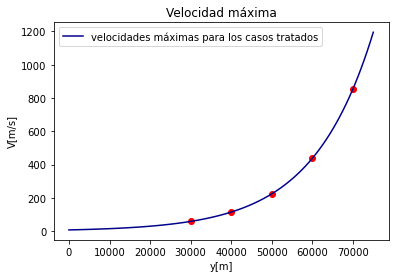

In [ ]:
y = np.linspace(0,75000,100)
plt.plot(h,Vmax,'ro')
plt.plot(y,vmax(y),color = 'darkblue', label ='velocidades máximas para los casos tratados')
plt.title('Velocidad máxima')
plt.xlabel('y[m]')
plt.ylabel('V[m/s]')
plt.legend();